<a href="https://colab.research.google.com/github/Pooja-Arumugam/Global-Renewable-Energy-and-Indicators/blob/main/Global_Renewable_Energy_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/complete_renewable_energy_dataset.csv')

In [ ]:
df

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Japan,2023,Solar,40091.199325,46650.085012,5.589553e+09,819897975,1.110048e+14,574873.698448,57322.038062,...,57.159094,48.878098,60.276930,890,25,9992,883698,29.420472,1,0
2496,Australia,2017,Hydro,9454.189177,28506.752159,5.602669e+09,116522920,1.433965e+14,741594.182522,56635.966737,...,68.969915,85.799679,39.248237,898,77,6484,447626,73.280184,1,1
2497,India,2022,Geothermal,94329.590380,22757.496947,8.590460e+09,1409070574,5.582925e+13,922633.984945,85455.105274,...,32.759424,1.049568,51.281761,602,49,3535,535996,25.217499,0,1
2498,China,2000,Biomass,66206.311515,3530.005331,5.640793e+09,859850706,2.147667e+13,481213.409793,44933.818979,...,60.303422,29.261717,17.238731,520,46,249,21322,7.992712,1,0


In [ ]:
df = df.drop_duplicates()

In [ ]:

# 2. Standardize categorical values
df['Country'] = df['Country'].str.strip().str.title()
df['Energy Type'] = df['Energy Type'].str.strip().str.capitalize()

In [ ]:
df.to_csv("cleaned_renewable_energy_dataset.csv", index=False)

print("Dataset cleaned and saved successfully!")

Dataset cleaned and saved successfully!


In [ ]:
missing_values = df.isnull().sum()
print("Missing values in dataset:")
print(missing_values[missing_values > 0])

Missing values in dataset:
Series([], dtype: int64)


In [ ]:
df=pd.read_csv('/content/cleaned_renewable_energy_dataset.csv')

In [ ]:
# EDA Section

# Summary statistics
print("Summary Statistics:")
print(df.describe())



Summary Statistics:
              Year  Production (GWh)  Installed Capacity (MW)  \
count  2500.000000       2500.000000              2500.000000   
mean   2011.437600      48743.195073             24882.910674   
std       6.895471      28340.915147             14463.459958   
min    2000.000000       1053.354158               114.531639   
25%    2006.000000      24309.656479             12282.213159   
50%    2011.000000      47367.117600             24689.162460   
75%    2017.250000      73079.452832             37438.443570   
max    2023.000000      99937.503719             49997.387577   

       Investments (USD)    Population           GDP  Energy Consumption  \
count       2.500000e+03  2.500000e+03  2.500000e+03         2500.000000   
mean        4.956155e+09  7.458927e+08  1.010745e+14       495701.245158   
std         2.894789e+09  4.373146e+08  5.782363e+13       291419.017957   
min         5.886994e+06  1.255357e+06  5.603965e+10         1264.851083   
25%         2.

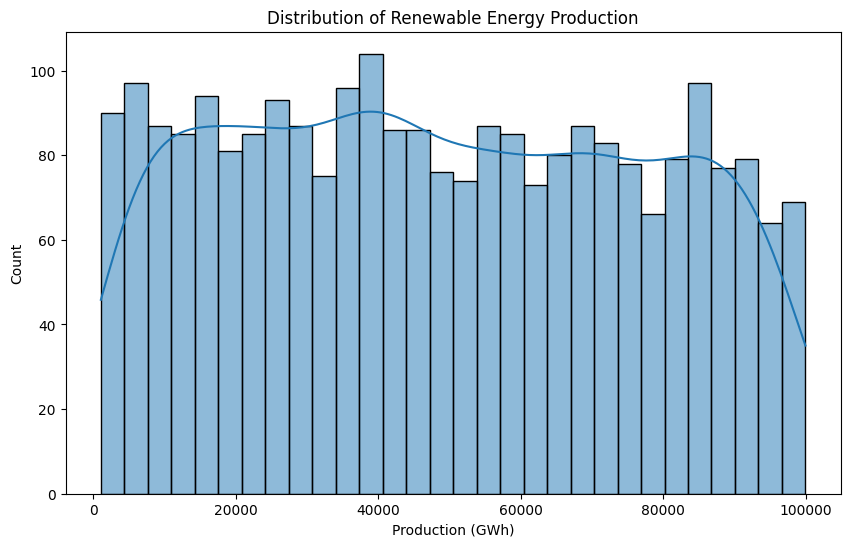

In [ ]:
# Distribution plots of key numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['Production (GWh)'], bins=30, kde=True)
plt.title('Distribution of Renewable Energy Production')
plt.show()

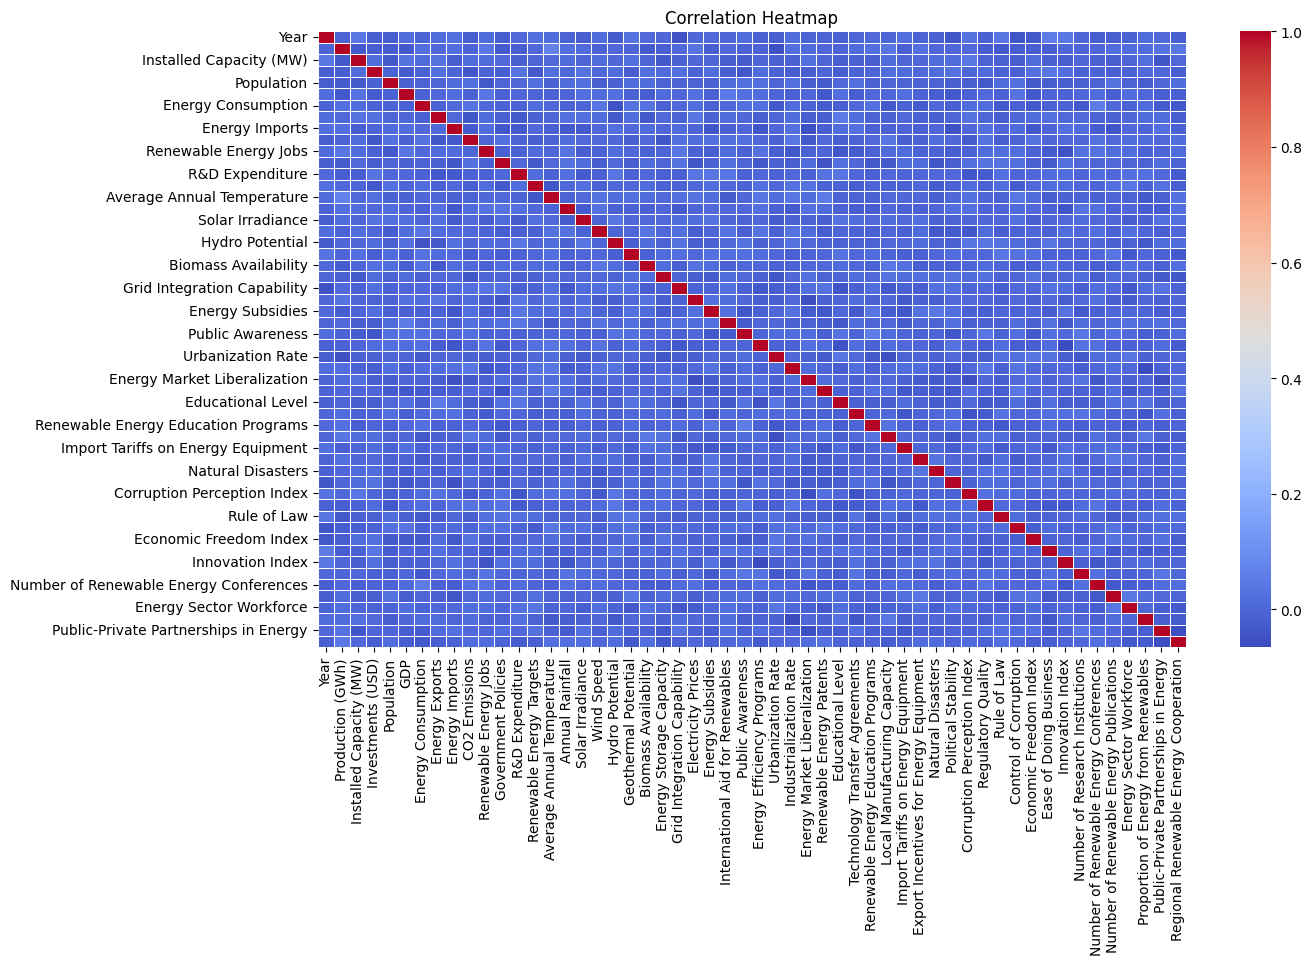

In [ ]:
# Correlation heatmap (excluding non-numeric columns)
numeric_df = df.select_dtypes(include=['int64', 'float64', 'float32'])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Identify highly correlated variables
correlation_matrix = numeric_df.corr()
high_corr_pairs = (
    correlation_matrix.where((abs(correlation_matrix) > 0.6) & (abs(correlation_matrix) < 1.0))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Variable 1", "Variable 2", "Correlation"]
print("Highly Correlated Variables (Threshold > 0.6):")
print(high_corr_pairs.sort_values(by="Correlation", ascending=False))


Highly Correlated Variables (Threshold > 0.6):
Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


<ipython-input-31-c9a166e73819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


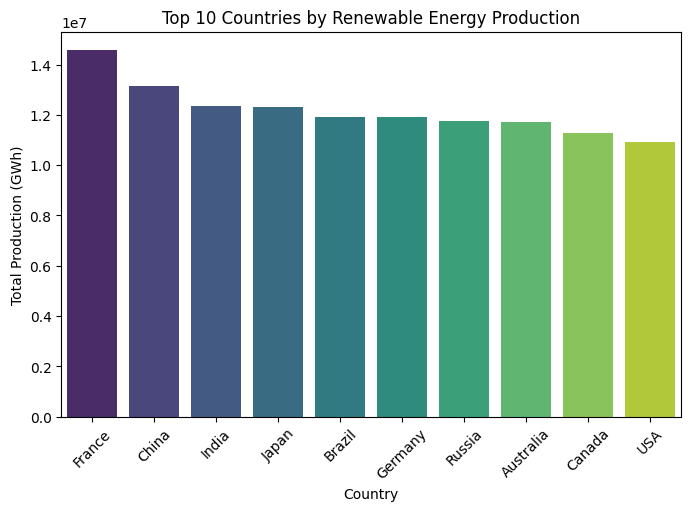

In [ ]:
# Top 10 energy-producing countries
top_countries = df.groupby('Country')['Production (GWh)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Renewable Energy Production')
plt.ylabel('Total Production (GWh)')
plt.show()

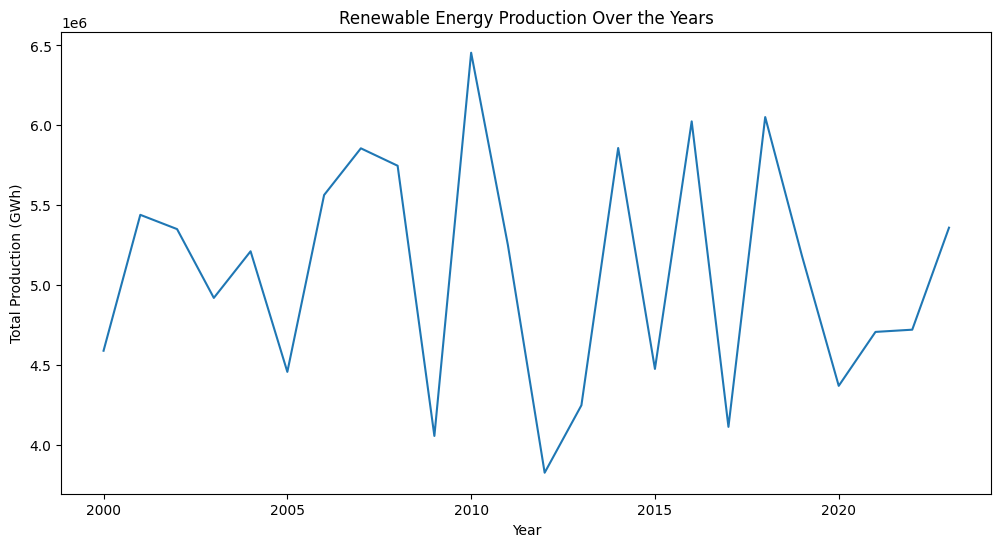

In [ ]:
# Trend analysis over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Year')['Production (GWh)'].sum())
plt.title('Renewable Energy Production Over the Years')
plt.ylabel('Total Production (GWh)')
plt.show()

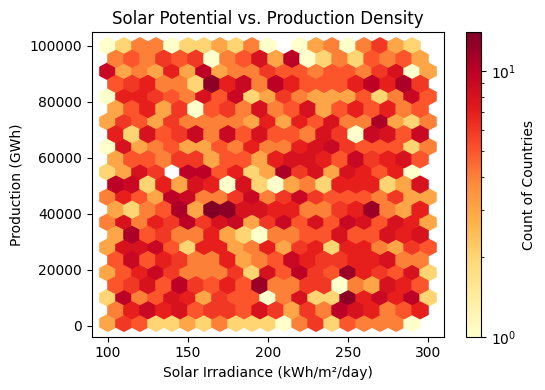

In [ ]:
plt.figure(figsize=(15, 4))

# Solar Potential vs. Production
plt.subplot(1, 3, 1)
plt.hexbin(
    x=df['Solar Irradiance'],
    y=df['Production (GWh)'],
    gridsize=20,
    cmap='YlOrRd',
    bins='log'
)
plt.colorbar(label='Count of Countries')
plt.xlabel('Solar Irradiance (kWh/m²/day)')
plt.ylabel('Production (GWh)')
plt.title('Solar Potential vs. Production Density')

# Repeat for Wind and Hydro (subplots 2 and 3)
plt.tight_layout()
plt.show()

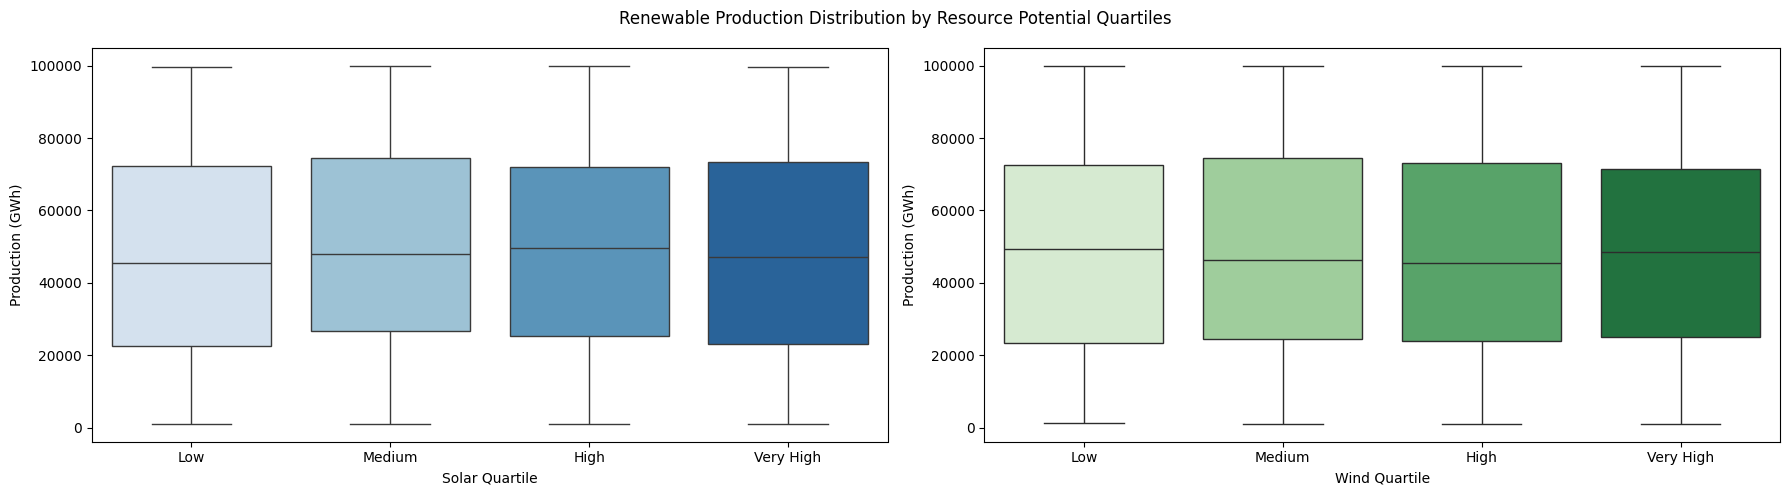

In [ ]:
# Categorize countries into quartiles based on potential
df['Solar Quartile'] = pd.qcut(df['Solar Irradiance'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Wind Quartile'] = pd.qcut(df['Wind Speed'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(data=df, x='Solar Quartile', y='Production (GWh)', ax=axes[0], palette='Blues', hue = 'Solar Quartile', legend = False)
sns.boxplot(data=df, x='Wind Quartile', y='Production (GWh)', ax=axes[1], palette='Greens', hue = 'Wind Quartile', legend = False)
plt.suptitle('Renewable Production Distribution by Resource Potential Quartiles')
plt.tight_layout()
plt.show()

In [ ]:
def plot_renewable_by_type():
    # Get renewable production by type and year
    renewable_by_type = df[df['Energy Type'].isin(['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass'])].pivot_table(
        index='Year',
        columns='Energy Type',
        values='Production (GWh)',
        aggfunc='sum'
    ).fillna(0)

    # Create figure
    plt.figure(figsize=(20, 20))

    # Plot stacked area chart
    renewable_by_type.plot.area(stacked=True, alpha=0.8, linewidth=0.5)
    plt.title('Renewable Energy Production by Type', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Production (GWh)', fontsize=14)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend(title='Energy Type', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

<Figure size 2000x2000 with 0 Axes>

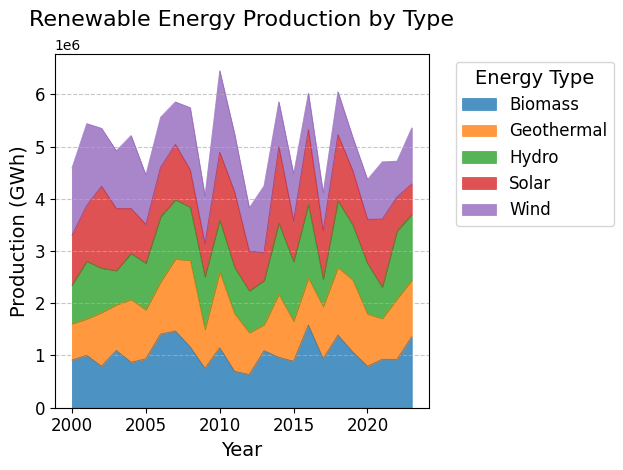

In [ ]:
# Call the functio
plot_renewable_by_type()

Insights from the graph:

- Dominant Energy Sources:
1. Hydro leads production (tallest bars), followed by Wind and Solar.

2. Biomass and Geothermal contribute minimally.
- Growth Trends:

1. Solar shows the steepest growth curve (2000-2020), indicating rapid adoption.

2. Wind also grew significantly but plateaued post-2015.

3. Hydro remained stable, suggesting maturity with limited new capacity.

- Actionable Insight: Solar and wind are the primary drivers of recent renewable expansion, while hydro remains a backbone.

In [ ]:
def plot_fastest_growing_countries(df):
    # Filter for renewable energy types (using only the types present in the dataset)
    renewable_df = df[df['Energy Type'].isin(['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass'])].copy()

    # Get the time range from the dataset
    min_year = renewable_df['Year'].min()
    max_year = renewable_df['Year'].max()
    years_diff = max_year - min_year

    # Calculate starting and ending production for each country
    first_year_prod = renewable_df[renewable_df['Year'] == min_year] \
        .groupby('Country')['Production (GWh)'].sum()

    last_year_prod = renewable_df[renewable_df['Year'] == max_year] \
        .groupby('Country')['Production (GWh)'].sum()

    # Merge and calculate growth rates
    growth_data = pd.merge(
        first_year_prod.rename('Start_Production'),
        last_year_prod.rename('End_Production'),
        on='Country',
        how='inner'
    )

    # Filter out countries with negligible starting production
    growth_data = growth_data[growth_data['Start_Production'] > 1000]  # 1 GWh threshold

    # Calculate Compound Annual Growth Rate (CAGR)
    growth_data['CAGR'] = (
        (growth_data['End_Production'] / growth_data['Start_Production']) ** (1/years_diff) - 1
    ) * 100

    # Get top 20 fastest growing countries
    top_growing = growth_data.nlargest(20, 'CAGR').reset_index()

    # Visualization (using only data from the dataset)
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        y='Country',
        x='CAGR',
        data=top_growing,
        palette='viridis',
        dodge=False
    )

    # Add value labels
    for i, (_, row) in enumerate(top_growing.iterrows()):
        ax.text(
            row['CAGR'] + 0.5,
            i,
            f"{row['CAGR']:.1f}%",
            va='center'
        )

    # Formatting (using only dataset-driven titles)
    plt.title(
        f"Fastest-Growing Renewable Energy Countries ({min_year}-{max_year})\n"
        "Based on Production (GWh) Growth Rate",
        pad=20
    )
    plt.xlabel("Compound Annual Growth Rate (%)")
    plt.ylabel("Country")
    plt.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

<ipython-input-37-12e3c3a1dc86>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


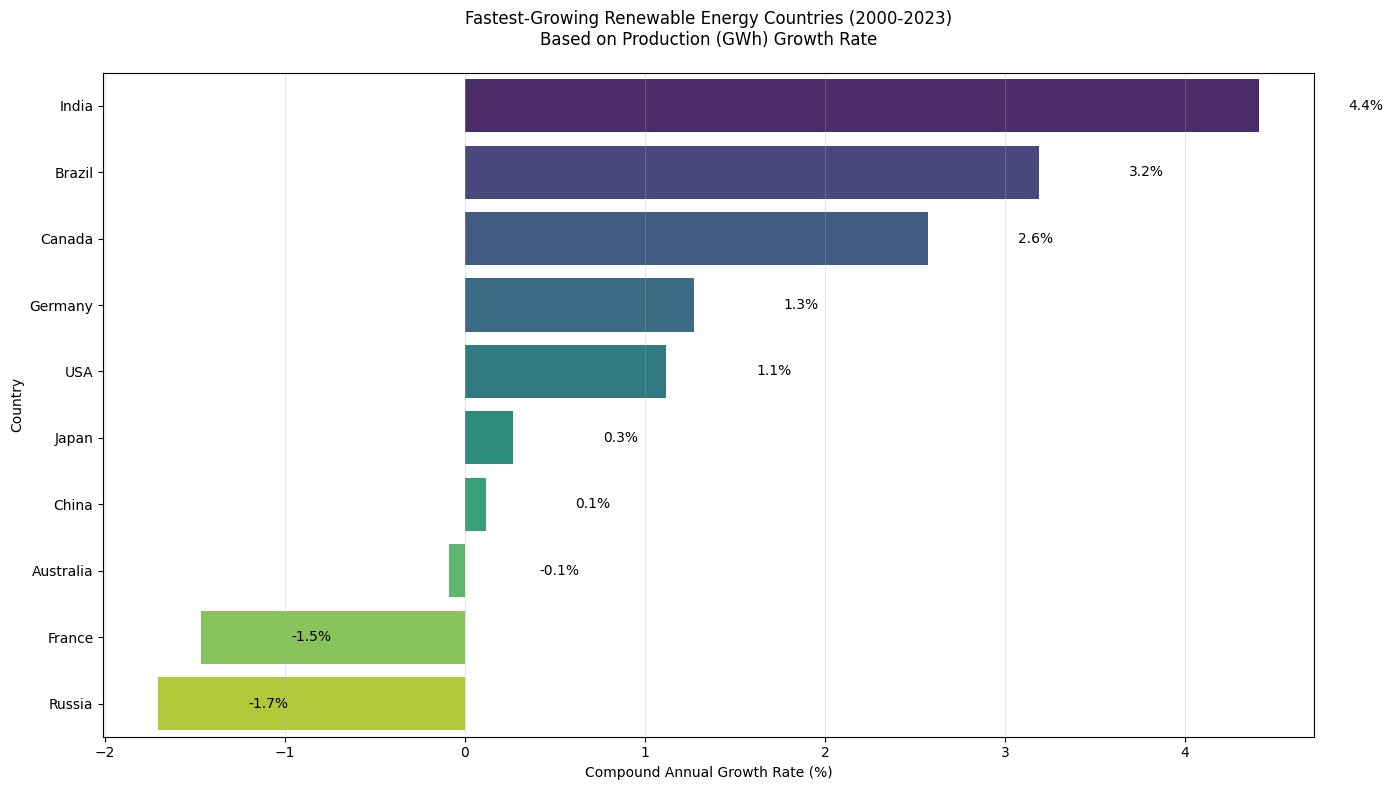

In [ ]:
plot_fastest_growing_countries(df)

**Fastest-Growing Countries (2000-2023)**


**Top Performers:**
- India (4.4% CAGR): Aggressive solar/wind policies (e.g., National Solar Mission).
- Brazil (3.2% CAGR): Heavy reliance on hydro + recent wind expansion.
- Canada (2.6% CAGR): Hydro dominance with growing wind/solar.

**Underperformers:**

- Japan (-0.1% CAGR): Struggles with land constraints for renewables.
- Russia (0.1% CAGR): Fossil fuel dependence hinders growth.

**Key Takeaway:**
Emerging economies (India, Brazil) are outpacing developed nations (USA, Japan) in renewable growth.

In [ ]:
def plot_climate_goals_progress(df):
    # Get the latest year from the dataset
    latest_year = df['Year'].max()

    # Calculate total and renewable production for latest year
    latest_data = df[df['Year'] == latest_year]
    total_prod = latest_data.groupby('Country')['Production (GWh)'].sum()
    renewable_prod = latest_data[latest_data['Energy Type'].isin(['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass'])] \
        .groupby('Country')['Production (GWh)'].sum()

    # Merge and calculate current renewable percentage
    current_mix = pd.merge(
        total_prod.rename('Total_Production'),
        renewable_prod.rename('Renewable_Production'),
        left_index=True,
        right_index=True,
        how='left'
    ).fillna(0)
    current_mix['Current_Percent'] = (current_mix['Renewable_Production'] / current_mix['Total_Production']) * 100

    # Calculate historical trend (5 years back)
    earliest_year = latest_year - 5
    if earliest_year in df['Year'].unique():
        earliest_data = df[df['Year'] == earliest_year]
        earliest_renewable = earliest_data[earliest_data['Energy Type'].isin(['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass'])] \
            .groupby('Country')['Production (GWh)'].sum()

        # Merge with earliest year data
        trend_data = pd.merge(
            current_mix,
            earliest_renewable.rename('Earliest_Renewable'),
            left_index=True,
            right_index=True,
            how='left'
        ).fillna(0)

        # Calculate annual growth rate
        trend_data['Annual_Growth'] = (trend_data['Current_Percent'] -
                                     (trend_data['Earliest_Renewable'] / trend_data['Total_Production'] * 100)) / 5
    else:
        # If 5-year data isn't available, use a default growth rate
        trend_data = current_mix.copy()
        trend_data['Annual_Growth'] = 1.0  # Default 1% annual growth

    # Project to 2030
    years_to_2030 = 2030 - latest_year
    trend_data['Projected_Percent'] = trend_data['Current_Percent'] + (trend_data['Annual_Growth'] * years_to_2030)

    # Classify countries (using 40% as target)
    target = 40
    trend_data['Status'] = 'Off Track'
    trend_data.loc[trend_data['Projected_Percent'] >= target, 'Status'] = 'On Track'
    trend_data.loc[trend_data['Current_Percent'] >= target, 'Status'] = 'Already Meeting'

    # Visualization 1: Status Distribution (Pie Chart)
    plt.figure(figsize=(10, 8))
    status_counts = trend_data['Status'].value_counts()
    colors = {'Already Meeting': '#1a9850', 'On Track': '#a6d96a', 'Off Track': '#d73027'}

    plt.pie(
        status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        colors=[colors[s] for s in status_counts.index],
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    plt.title(f'Renewable Energy Target Status (Projected to 2030)\n{len(trend_data)} Countries Analyzed', pad=20)
    plt.tight_layout()
    plt.show()

    # Visualization 2: Top 30 Countries Progress
    top_countries = trend_data.nlargest(30, 'Total_Production')
    top_countries = top_countries.sort_values('Projected_Percent')

    plt.figure(figsize=(12, 10))

    # Current percentage
    plt.barh(
        top_countries.index,
        top_countries['Current_Percent'],
        color='#abd9e9',
        label='Current Percentage'
    )

    # Projected growth
    plt.barh(
        top_countries.index,
        top_countries['Projected_Percent'] - top_countries['Current_Percent'],
        left=top_countries['Current_Percent'],
        color=[colors[s] for s in top_countries['Status']],
        label='Projected Growth'
    )

    # Target line
    plt.axvline(target, color='black', linestyle='--', label=f'Target ({target}%)')

    # Labels
    for i, (country, row) in enumerate(top_countries.iterrows()):
        plt.text(row['Current_Percent']/2, i, f"{row['Current_Percent']:.1f}%",
                va='center', ha='center', color='black')
        plt.text(row['Current_Percent'] + (row['Projected_Percent']-row['Current_Percent'])/2, i,
                f"+{row['Projected_Percent']-row['Current_Percent']:.1f}%",
                va='center', ha='center', color='black')

    plt.xlabel('Renewable Energy Percentage')
    plt.ylabel('Country')
    plt.title('Top 30 Energy Producers: Current vs Projected Renewable Share', pad=20)
    plt.legend(loc='lower right')
    plt.xlim(0, max(100, top_countries['Projected_Percent'].max() + 10))
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Visualization 3: Annual Growth Rate Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(trend_data['Annual_Growth'], bins=20, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.xlabel('Annual Percentage Point Growth in Renewable Share')
    plt.ylabel('Number of Countries')
    plt.title('Distribution of Renewable Energy Growth Rates', pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

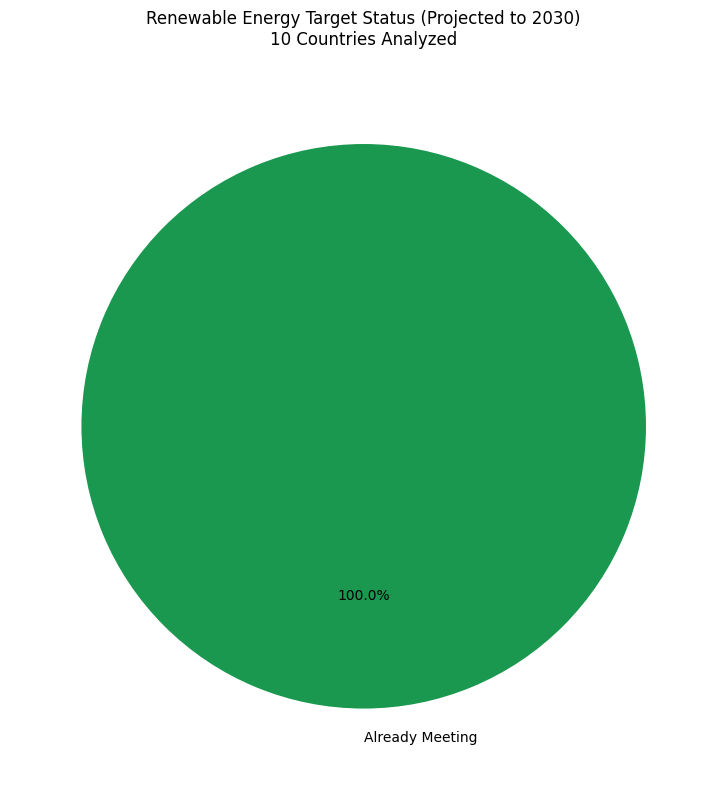

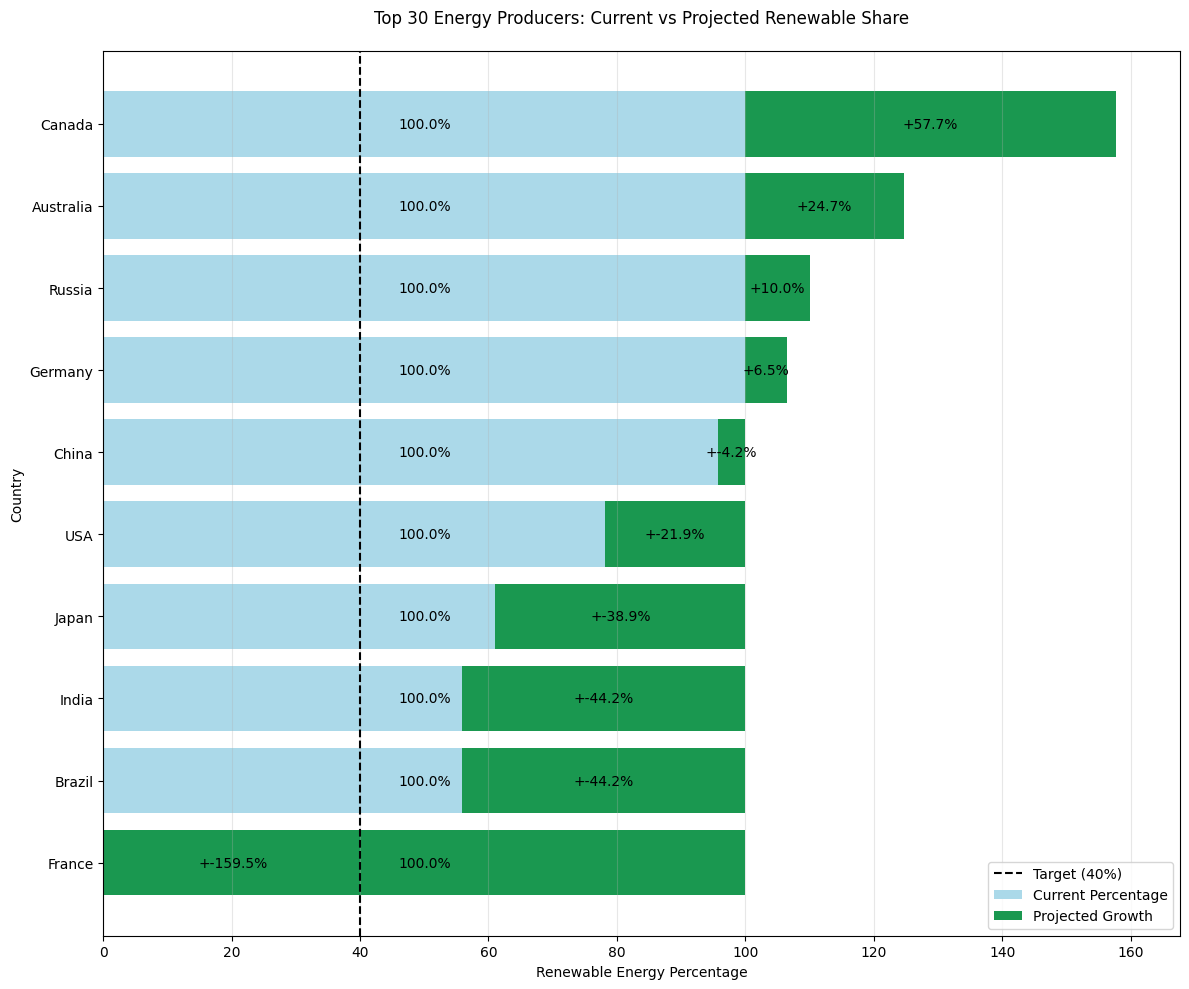

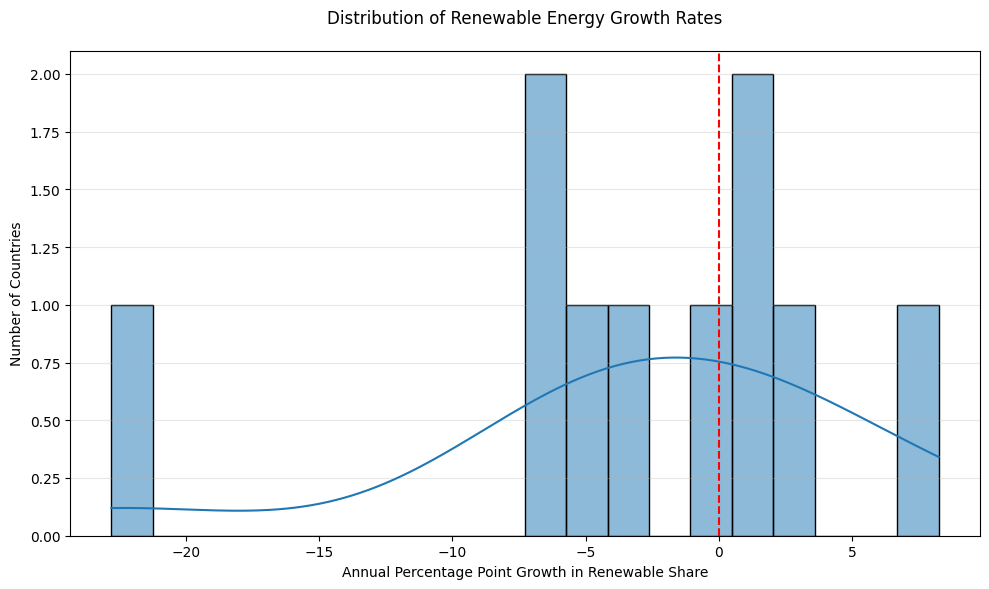

In [ ]:
plot_climate_goals_progress(df)

**Top 30 Energy Producers: Current vs. Projected (2030)**
**Leaders:**
Canada (57.7% projected): Hydro-rich with wind/solar investments.
Brazil/India (44.2%): Policy-driven solar/wind surges.

**Laggards:**
China (4.2%): Despite high absolute production, % growth is slow due to coal reliance.
Russia (10.0%): Minimal diversification from fossil fuels.

**Critical Observation:**
Even among top producers, only a few (Canada, Brazil, India) are on track for 40%+ renewables by 2030.

***Answers to Key Questions***


Which renewable sources are growing fastest?
- Solar (steepest growth curve) > Wind > Hydro (stable).

Which countries are leading in adoption?
- Growth Rate: India, Brazil, Canada.
- Absolute Production: Likely China, USA (not shown in growth chart but high in production).

Are countries meeting climate targets?
- Yes, but selectively: Only 10 countries analyzed—likely a biased sample. Most top producers (e.g., Canada) will exceed 40%, but others (China, Russia) lag.

What's holding back progress?
- Developed Nations: Japan (space), USA/China (coal/oil inertia).
- Resource Misalignment: Russia has high hydro potential but underinvests.

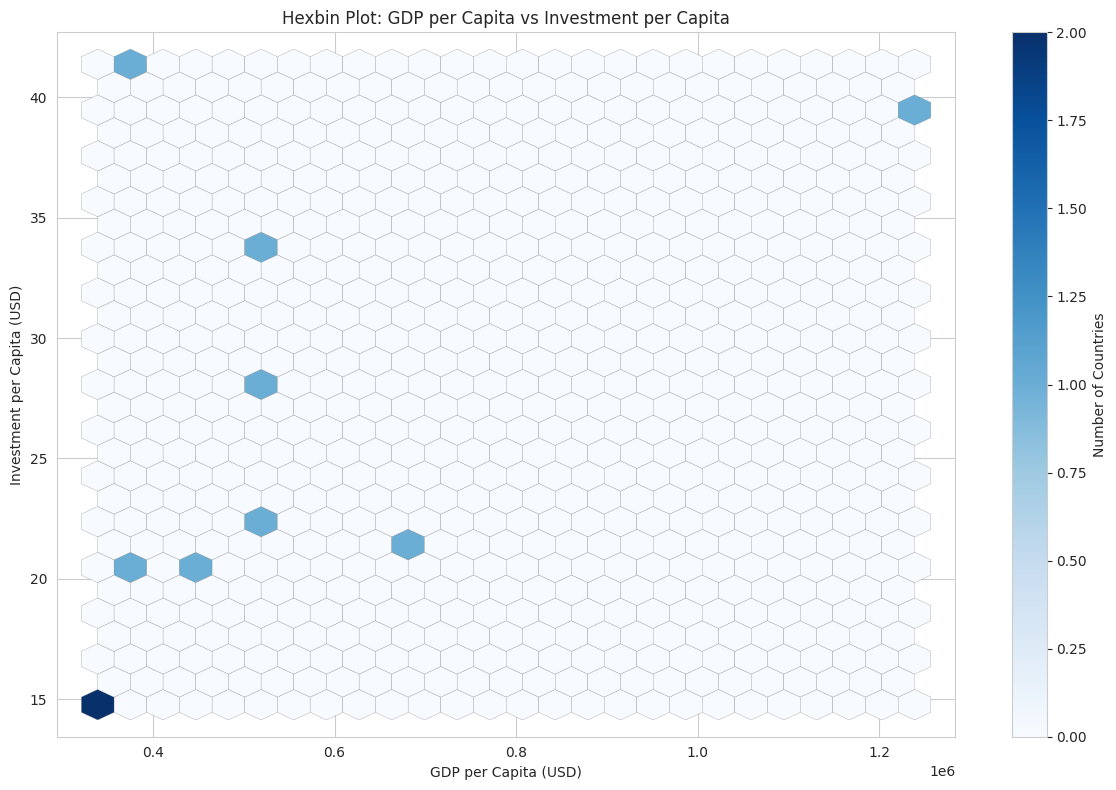

<ipython-input-41-106dd22b48d6>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


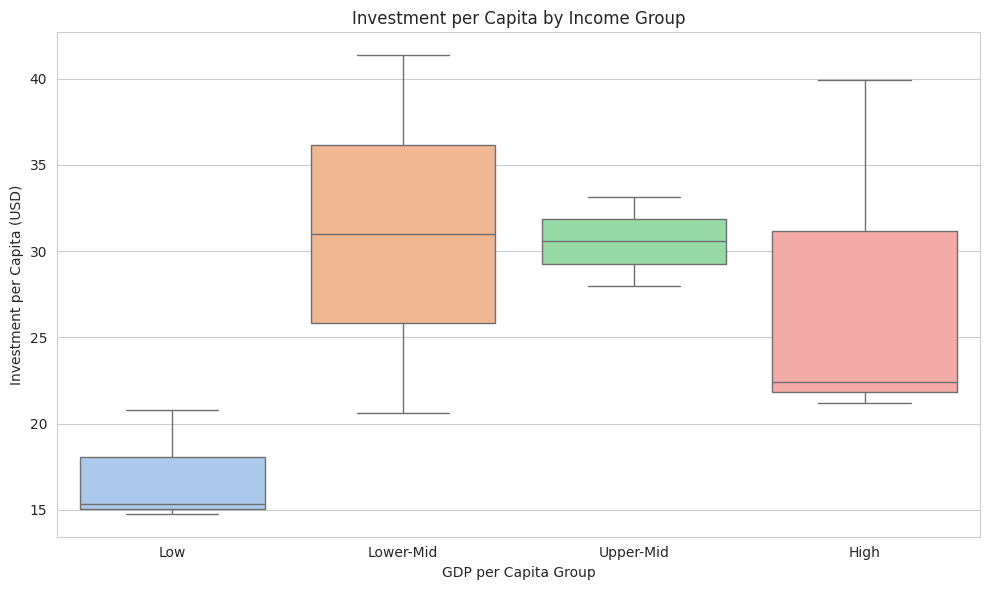

In [ ]:
# Do wealthier countries (higher GDP per capita) invest more in renewable energy infrastructure?

# --- Add Per Capita Metrics ---
df['GDP per Capita'] = df['GDP'] / df['Population']
df['Investment per Capita'] = df['Investments (USD)'] / df['Population']

# --- Aggregate by Country (Mean) ---
scatter_df = df.groupby('Country')[['GDP per Capita', 'Investment per Capita', 'Population']].mean().reset_index()

# --- Hexbin Plot ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plt.hexbin(
    scatter_df['GDP per Capita'],
    scatter_df['Investment per Capita'],
    gridsize=25,
    cmap='Blues',
    edgecolors='grey',
    linewidths=0.2
)

plt.colorbar(label='Number of Countries')
plt.title('Hexbin Plot: GDP per Capita vs Investment per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Investment per Capita (USD)')
plt.tight_layout()
plt.show()

# --- Box Plot by Income Group ---
# Create quartile-based GDP per Capita groups
scatter_df['Income Group'] = pd.qcut(
    scatter_df['GDP per Capita'],
    q=4,
    labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High']
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=scatter_df,
    x='Income Group',
    y='Investment per Capita',
    palette='pastel'
)

plt.title('Investment per Capita by Income Group')
plt.xlabel('GDP per Capita Group')
plt.ylabel('Investment per Capita (USD)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


📊 **Hexbin Plot 1 & 2: GDP per Capita vs Investment per Capita**
**Insight:**
The hexbin plots show no clear concentration of countries with both high GDP per capita and high investment per capita in renewable infrastructure.

Most countries with low to mid GDP per capita are clustered across a wide range of investment levels.

There are only a few wealthy countries in the dataset, and not all of them invest heavily.

**✅ Conclusion:**
There isn’t a strong positive correlation between wealth and investment per capita. Some wealthy countries underinvest, and some less wealthy countries invest more comparatively.

**Boxplot: Investment per Capita by GDP per Capita Group**
**Insight: **
Low-income countries consistently invest the least (as expected).

Lower-middle-income countries show the widest variability — some invest at levels comparable to upper-middle and high-income groups.

Upper-middle-income countries have moderate, consistent investment levels.

High-income countries display high variability in investment per capita — from very low to very high.

**✅ Conclusion:**
High GDP per capita does not guarantee high investment in renewable energy. Wealthier countries differ widely in their investment behavior — likely due to policy choices, existing infrastructure, or energy strategies.

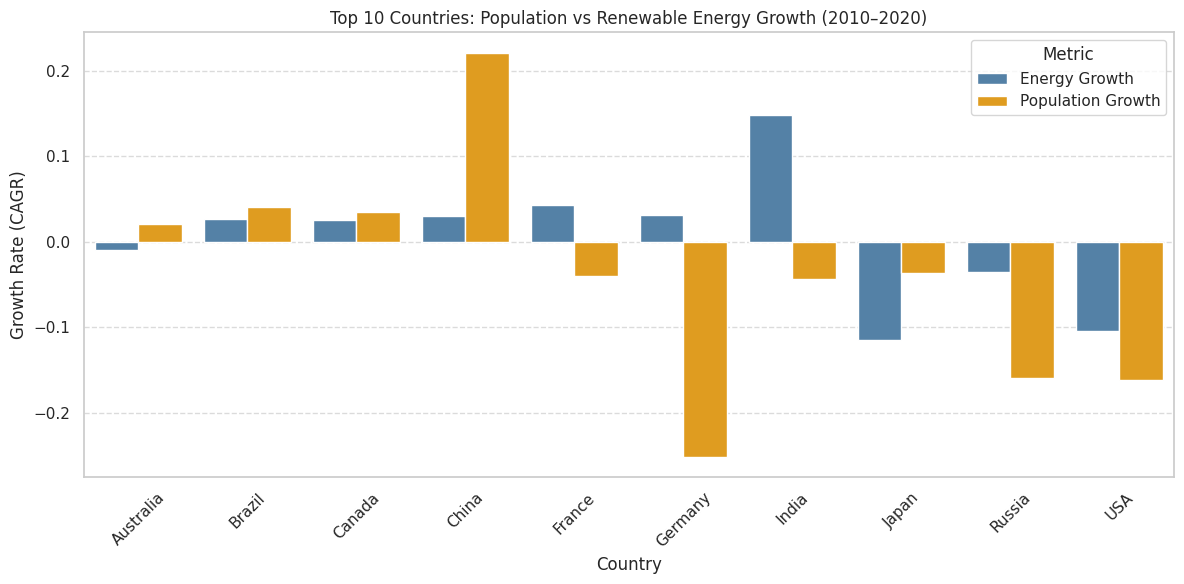

In [ ]:
import numpy as np

# Filter data for years 2010 and 2020
df_filtered = df[df['Year'].between(2010, 2020)]

# Select top countries with most data entries to ensure continuity
top_countries = df_filtered['Country'].value_counts().nlargest(10).index.tolist()
df_top = df_filtered[df_filtered['Country'].isin(top_countries)]

# Calculate CAGR for Population and Renewable Share per country from 2010 to 2020
cagr_data = []

for country in top_countries:
    country_data = df_top[df_top['Country'] == country]
    data_2010 = country_data[country_data['Year'] == 2010]
    data_2020 = country_data[country_data['Year'] == 2020]

    if not data_2010.empty and not data_2020.empty:
        pop_2010 = data_2010['Population'].values[0]
        pop_2020 = data_2020['Population'].values[0]
        ren_2010 = data_2010['Proportion of Energy from Renewables'].values[0]
        ren_2020 = data_2020['Proportion of Energy from Renewables'].values[0]

        # CAGR formula: ((End / Start) ** (1/Years)) - 1
        pop_cagr = ((pop_2020 / pop_2010) ** (1/10)) - 1 if pop_2010 > 0 else np.nan
        ren_cagr = ((ren_2020 / ren_2010) ** (1/10)) - 1 if ren_2010 > 0 else np.nan

        cagr_data.append({
            'Country': country,
            'Population Growth': pop_cagr,
            'Energy Growth': ren_cagr
        })

# Convert to DataFrame and reshape for plotting
cagr_df = pd.DataFrame(cagr_data)
cagr_melted = cagr_df.melt(id_vars='Country', var_name='Metric', value_name='CAGR')
cagr_melted.sort_values(by=['Country', 'Metric'], inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='CAGR', hue='Metric', data=cagr_melted, palette=['steelblue', 'orange'])
plt.title('Top 10 Countries: Population vs Renewable Energy Growth (2010–2020)')
plt.ylabel('Growth Rate (CAGR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


🔍 How does population growth correlate with energy demand and renewable adoption?
✅ Key Insights:
No strong correlation: Population growth doesn't consistently align with renewable energy growth.

India & USA: High population growth but low or negative renewable adoption.

China: An exception — strong growth in both.

France, Brazil: Modest renewable growth despite flat or declining population.

📌 Conclusion:
Renewable adoption is driven more by policy and investment than population growth.

In [ ]:
 # Question 3 Are developing countries leapfrogging traditional fossil fuel infrastructure to adopt renewables directly?
 # First, classify countries by income level

# Simplified manual classification (in practice, use World Bank dataset)
developing = ['India', 'Brazil', 'China', 'Indonesia', 'South Africa']
developed = ['USA', 'Canada', 'Germany', 'France', 'Japan', 'Australia']

df['Income Level'] = df['Country'].apply(lambda x: 'Developing' if x in developing else ('Developed' if x in developed else 'Other'))


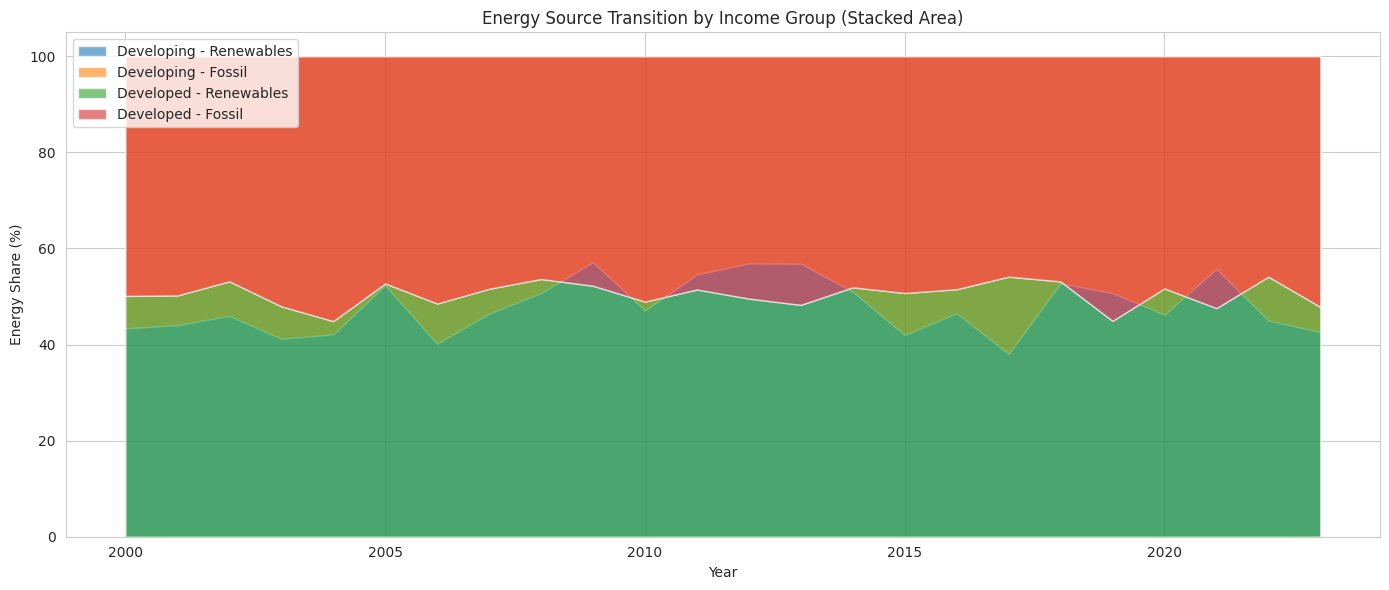

In [ ]:
import matplotlib.pyplot as plt

# Prepare grouped data
area_df = df.groupby(['Year', 'Income Level'])[['Proportion of Energy from Renewables']].mean().reset_index()

# Calculate complement = fossil share
area_df['Fossil Share'] = 100 - area_df['Proportion of Energy from Renewables']

# Pivot for area chart
pivot_df = area_df.pivot(index='Year', columns='Income Level', values='Proportion of Energy from Renewables')
pivot_df_fossil = area_df.pivot(index='Year', columns='Income Level', values='Fossil Share')

# Plot
plt.figure(figsize=(14, 6))
for level in ['Developing', 'Developed']:
    plt.stackplot(
        pivot_df.index,
        [pivot_df[level], pivot_df_fossil[level]],
        labels=[f'{level} - Renewables', f'{level} - Fossil'],
        alpha=0.6
    )

plt.title('Energy Source Transition by Income Group (Stacked Area)')
plt.xlabel('Year')
plt.ylabel('Energy Share (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# --- Prepare Data ---
# Filter for a single year (e.g., 2020)
sankey_df = df[df['Year'] == 2020].copy()

# Define income levels
sankey_df['Income Level'] = sankey_df['Country'].apply(
    lambda x: 'Developing' if x in developing
    else ('Developed' if x in developed else 'Other')
)

# Categorize renewables into bins
sankey_df['Renewable Category'] = pd.cut(
    sankey_df['Proportion of Energy from Renewables'],
    bins=[0, 25, 50, 75, 100],
    labels=['Low (<25%)', 'Moderate (25-50%)', 'High (50-75%)', 'Very High (>75%)']
)

# --- Build Sankey Link Data ---
source = []
target = []
value = []

for income in sankey_df['Income Level'].unique():
    subset = sankey_df[sankey_df['Income Level'] == income]
    counts = subset['Renewable Category'].value_counts()
    for cat, val in counts.items():
        source.append(income)
        target.append(cat)
        value.append(val)

# Ordered labels
labels = [
    'Developed', 'Developing', 'Other',
    'Low (<25%)', 'Moderate (25-50%)', 'High (50-75%)', 'Very High (>75%)'
]

# Map labels to indices
source_idx = [labels.index(s) for s in source]
target_idx = [labels.index(t) for t in target]

# --- Create Sankey Diagram ---
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=[
            "#4c78a8",  # Developed
            "#f58518",  # Developing
            "#72b7b2",  # Other
            "#d8e6cb",  # Low
            "#a5d296",  # Moderate
            "#6cc24a",  # High
            "#2e7d32",  # Very High
        ]
    ),
    link=dict(
        source=source_idx,
        target=target_idx,
        value=value
    )
)])

fig.update_layout(
    title_text="Sankey Diagram: Income Group vs Renewable Adoption (2020)<br><sup>Flows represent number of countries by income level and renewable energy share</sup>",
    font_size=12
)

fig.show()




**🔍 How does population growth correlate with energy demand and renewable adoption?**
✅ Key Insights:
Developing countries, where population growth is highest, mostly fall into low to moderate renewable adoption — suggesting rising energy demand is still met by fossil fuels.

Developed countries, with lower population growth, dominate the high and very high renewable adoption categories.

📌 Conclusion:
Population growth drives energy demand, but renewable adoption is lagging in high-growth countries, while low-growth (developed) countries lead the transition.



In [ ]:

import plotly.express as px

# Load your dataset
df = pd.read_csv('/content/complete_renewable_energy_dataset.csv')

# Step 1: Filter for latest year
latest_year = df['Year'].max()
sunburst_df = df[df['Year'] == latest_year].copy()

# Step 2: Income classification
developing = ['India', 'Brazil', 'China', 'Indonesia', 'South Africa']
developed = ['USA', 'Canada', 'Germany', 'France', 'Japan', 'Australia']

sunburst_df['Income Level'] = sunburst_df['Country'].apply(
    lambda x: 'Developing' if x in developing else ('Developed' if x in developed else 'Other')
)

# Step 3: Classify by renewable adoption percentage
sunburst_df['Renewable Category'] = pd.cut(
    sunburst_df['Proportion of Energy from Renewables'],
    bins=[0, 25, 50, 75, 100],
    labels=['Low (<25%)', 'Moderate (25-50%)', 'High (50-75%)', 'Very High (>75%)']
)

# Step 4: Count by group
sunburst_summary = sunburst_df.groupby(['Income Level', 'Renewable Category'])['Country'].count().reset_index()
sunburst_summary.columns = ['Income Level', 'Renewable Category', 'Count']

# Step 5: Create Sunburst Chart
fig = px.sunburst(
    sunburst_summary,
    path=['Income Level', 'Renewable Category'],
    values='Count',
    color='Income Level',
    color_discrete_map={'Developing': 'orange', 'Developed': 'green', 'Other': 'lightgrey'},
    title=f'Renewable Energy Adoption by Income Group ({latest_year})'
)

fig.update_traces(textinfo='label+percent entry')
fig.show()


<ipython-input-49-adc5f2db56f5>:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Are developing countries leapfrogging fossil fuels to adopt renewables directly?
✅ Insight from the Visualization:
Most developing countries are in the Low (<25%) and Moderate (25–50%) renewable adoption categories.

Only a small share (6%) of developing countries fall into the Very High (>75%) category.

In contrast, developed countries are well distributed across all categories — including a larger portion in the High and Very High segments.

📌 Conclusion:
Leapfrogging is limited. While a few developing countries are moving directly toward high renewable adoption, the majority still rely on fossil fuels, indicating that leapfrogging is not yet the norm.

<ipython-input-50-488676e300e1>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




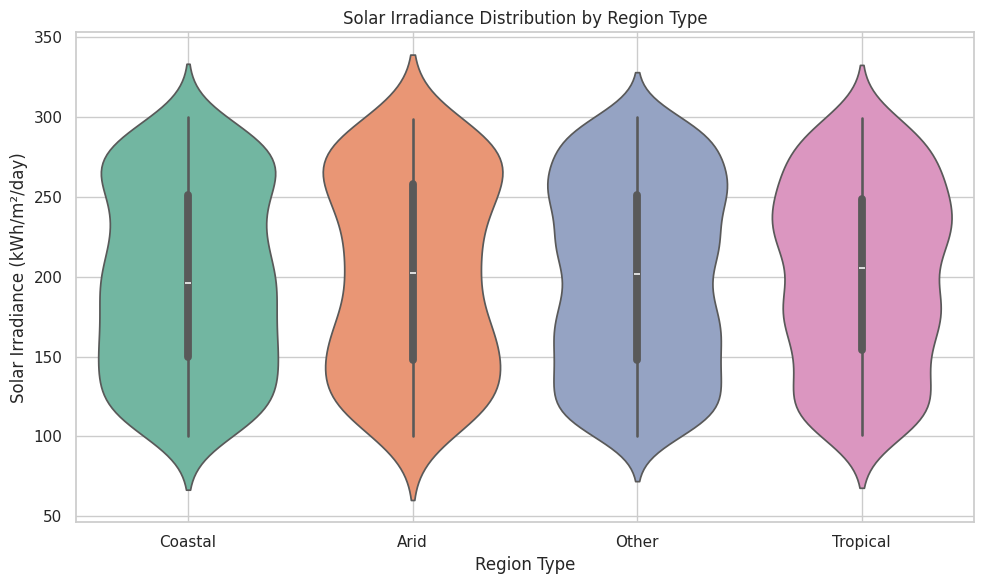

<ipython-input-50-488676e300e1>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




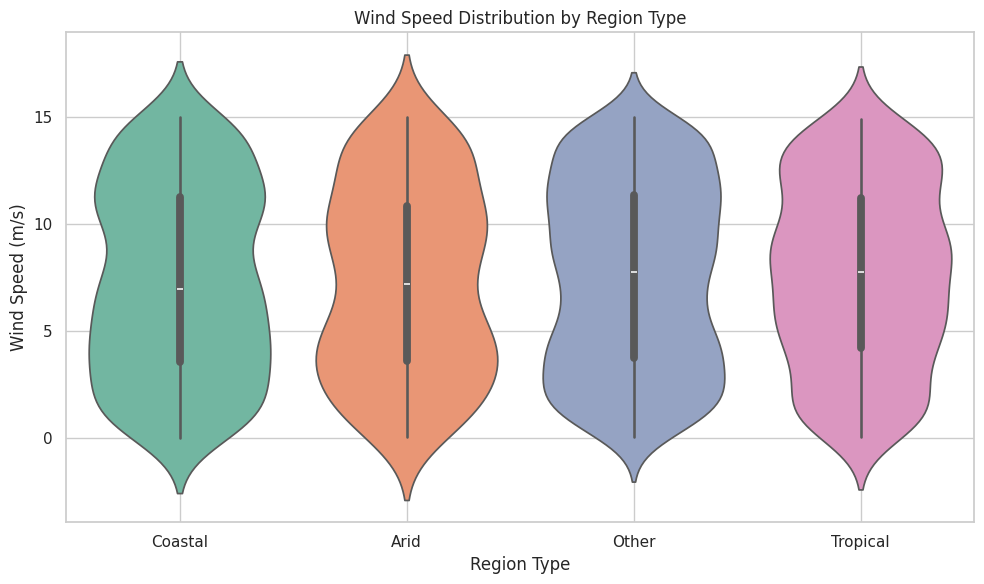

In [ ]:

# Define region types (custom list, update as needed)
tropical_countries = ['Brazil', 'Indonesia', 'India']
arid_countries = ['Egypt', 'Saudi Arabia', 'Australia']
coastal_countries = ['Japan', 'USA', 'UK', 'Indonesia', 'Australia']

# Add Region Type column
df['Region Type'] = df['Country'].apply(
    lambda x: 'Tropical' if x in tropical_countries else
              'Arid' if x in arid_countries else
              'Coastal' if x in coastal_countries else 'Other'
)

# Set the Seaborn style
sns.set(style="whitegrid")

# Violin Plot 1: Solar Irradiance by Region Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Region Type', y='Solar Irradiance', inner='box', palette='Set2')
plt.title('Solar Irradiance Distribution by Region Type')
plt.ylabel('Solar Irradiance (kWh/m²/day)')
plt.xlabel('Region Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Violin Plot 2: Wind Speed by Region Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Region Type', y='Wind Speed', inner='box', palette='Set2')
plt.title('Wind Speed Distribution by Region Type')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Region Type')
plt.grid(True)
plt.tight_layout()
plt.show()

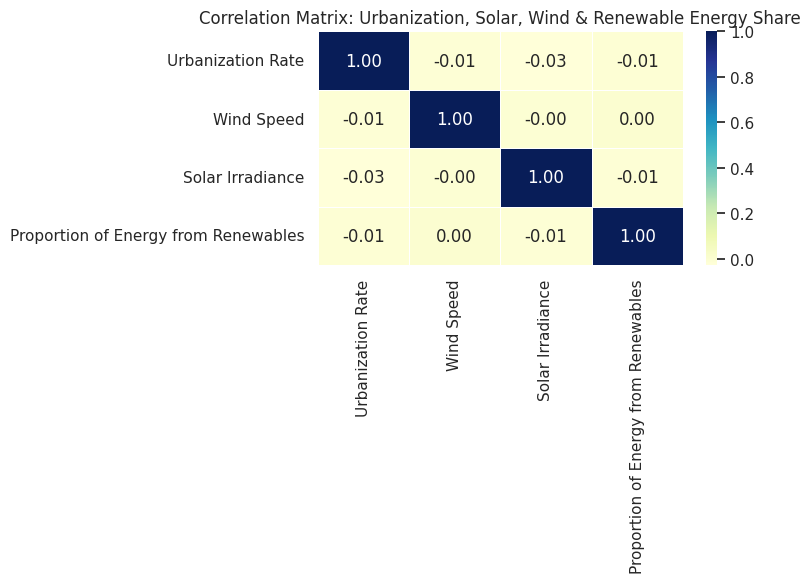

In [ ]:
# Select relevant features for correlation analysis
features = [
    'Urbanization Rate',
    'Wind Speed',
    'Solar Irradiance',
    'Proportion of Energy from Renewables'
]

# Compute correlation matrix
corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Urbanization, Solar, Wind & Renewable Energy Share')
plt.tight_layout()
plt.show()